# Interview Q:

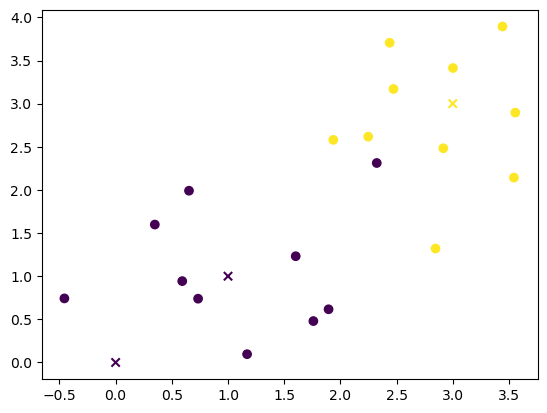

In [100]:
import numpy as np
def dist(X: np.ndarray, Y: np.ndarray) -> float:
    return np.sqrt((X-Y).T @ (X-Y))

def knn(X_train: np.ndarray, k: int, X: np.ndarray, y: np.ndarray) -> int:
    distances = []

    for X_i in X_train:
        distances.append(dist(X_i, X))

    candidates = np.argsort(distances)[:k]
    return 1 if sum([y[c] for c in candidates]) > (len(candidates)/2) else 0

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=20,
                  centers = [[1,1], [3,3]],
                  random_state=123,
                  cluster_std=0.6)

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)


X1 = [3,3] # expect 1 = yellow
X2 = [0,0] # expect 0 = purple
X3 = [1,1] # expect 0 (purple)
k = 5
X_test = np.array([X1, X2, X3])
y_test = np.array([knn(X, k, p,y) for p in X_test])
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='x')
plt.show()

# Computer Vision Test Q

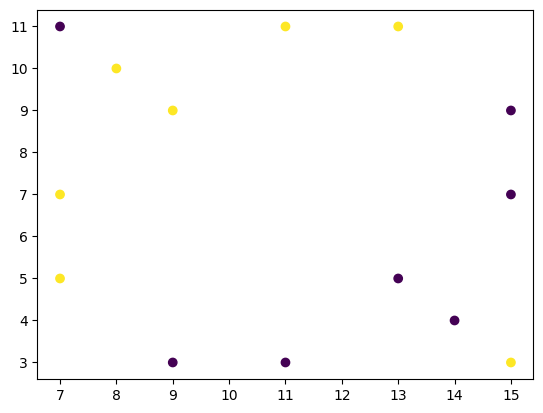

In [17]:
import numpy as np
def dist(X: np.ndarray, Y: np.ndarray) -> float:
    return np.sqrt((X-Y).T @ (X-Y))

def knn(X_train: np.ndarray, k: int, X: np.ndarray, y: np.ndarray) -> int:
    distances = []

    for X_i in X_train:
        distances.append(dist(X_i, X))

    candidates = np.argsort(distances)[:k]
    return 1 if sum([y[c] for c in candidates]) > (len(candidates)/2) else 0

from sklearn.datasets import make_blobs


X1 = np.array([7,11])
X2 = np.array([11,11])
X3 = np.array([13,11])
X4 = np.array([8,10])
X5 = np.array([9,9])
X6 = np.array([15,9])
X7 = np.array([7,7])
X8 = np.array([15,7])
X9 = np.array([7,5])
X10 = np.array([13,5])
X11 = np.array([14,4])
X12 = np.array([9,3])
X13 = np.array([11,3])
X14 = np.array([15,3])

X = np.array([X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14])

y = np.array([0,1,1,1,1,0,1,0,1,0,0,0,0,1])

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)


plt.show()

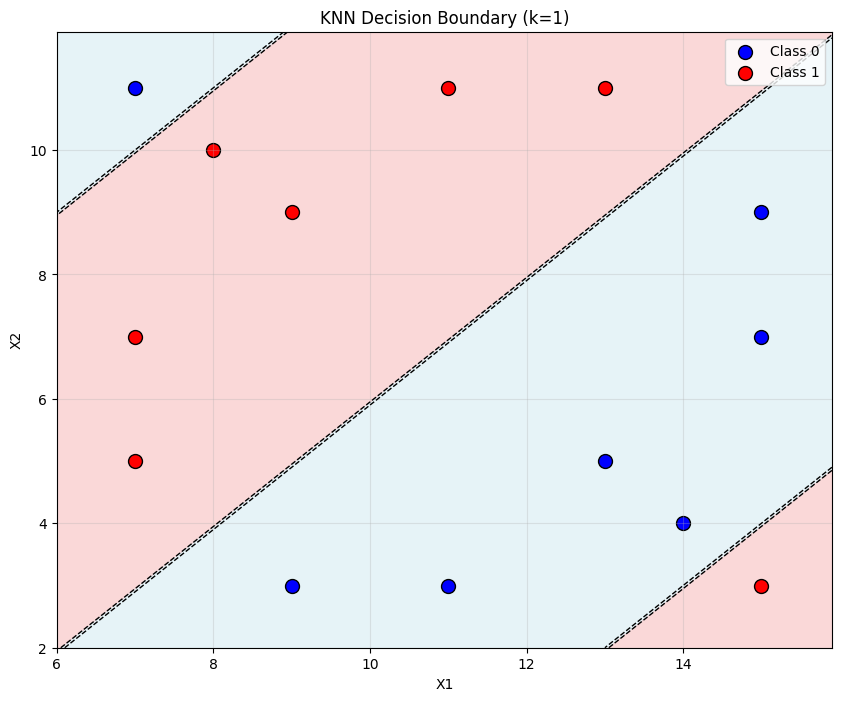

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def dist(X: np.ndarray, Y: np.ndarray) -> float:
    return np.sqrt((X-Y).T @ (X-Y))

def knn(X_train: np.ndarray, k: int, X: np.ndarray, y: np.ndarray) -> int:
    distances = []

    for X_i in X_train:
        distances.append(dist(X_i, X))

    candidates = np.argsort(distances)[:k]
    return 1 if sum([y[c] for c in candidates]) > (len(candidates)/2) else 0

# Data points
X1 = np.array([7,11])
X2 = np.array([11,11])
X3 = np.array([13,11])
X4 = np.array([8,10])
X5 = np.array([9,9])
X6 = np.array([15,9])
X7 = np.array([7,7])
X8 = np.array([15,7])
X9 = np.array([7,5])
X10 = np.array([13,5])
X11 = np.array([14,4])
X12 = np.array([9,3])
X13 = np.array([11,3])
X14 = np.array([15,3])

X = np.array([X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14])
y = np.array([0,1,1,1,1,0,1,0,1,0,0,0,0,1])
#y = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])

# Create a mesh of points to evaluate the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Flatten the mesh and create test points
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# Predict class for each point in the mesh
Z = []
for point in mesh_points:
    prediction = knn(X, 1, point, y)
    Z.append(prediction)

Z = np.array(Z)
Z = Z.reshape(xx.shape)

# Create the plot
plt.figure(figsize=(10, 8))

# Plot the decision boundary as a contour
plt.contourf(xx, yy, Z, levels=1, alpha=0.3, colors=['lightblue', 'lightcoral'])
plt.contour(xx, yy, Z, levels=1, colors='black', linestyles='--', linewidths=1)

# Plot the training data points
colors = ['blue', 'red']
labels = ['Class 0', 'Class 1']
for i in range(2):
    mask = (y == i)
    plt.scatter(X[mask, 0], X[mask, 1], c=colors[i], label=labels[i], 
                s=100, edgecolors='black', linewidth=1)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('KNN Decision Boundary (k=1)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## voronoi

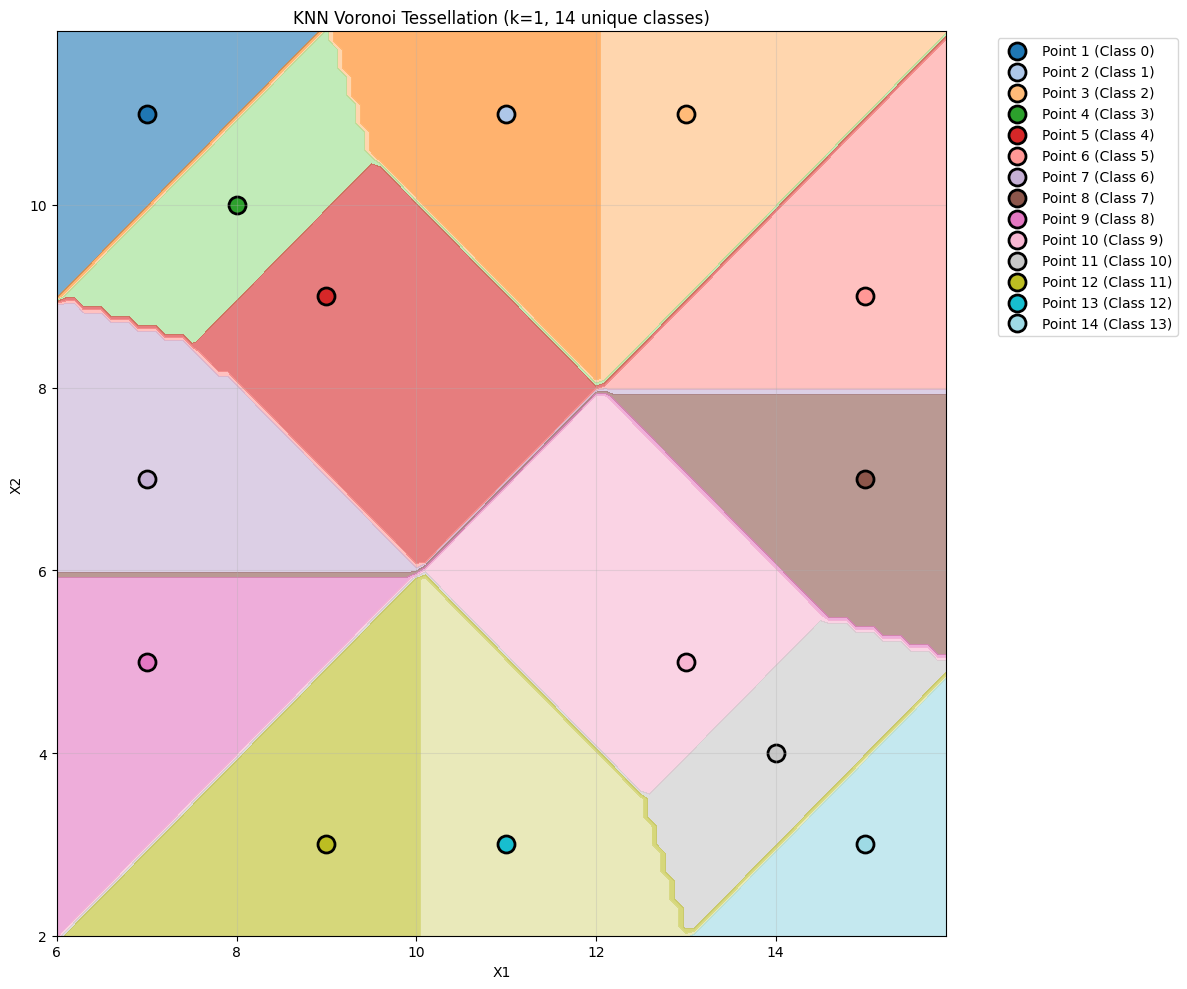

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def dist(X: np.ndarray, Y: np.ndarray) -> float:
    return np.sqrt((X-Y).T @ (X-Y))

def knn(X_train: np.ndarray, k: int, X: np.ndarray, y: np.ndarray) -> int:
    distances = []

    for X_i in X_train:
        distances.append(dist(X_i, X))

    candidates = np.argsort(distances)[:k]
    # For k=1 with unique classes, just return the class of the nearest neighbor
    return y[candidates[0]]

# Data points
X1 = np.array([7,11])
X2 = np.array([11,11])
X3 = np.array([13,11])
X4 = np.array([8,10])
X5 = np.array([9,9])
X6 = np.array([15,9])
X7 = np.array([7,7])
X8 = np.array([15,7])
X9 = np.array([7,5])
X10 = np.array([13,5])
X11 = np.array([14,4])
X12 = np.array([9,3])
X13 = np.array([11,3])
X14 = np.array([15,3])

X = np.array([X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14])
y = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])  # 14 unique classes

# Create a mesh of points to evaluate the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Flatten the mesh and create test points
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# Predict class for each point in the mesh
Z = []
for point in mesh_points:
    prediction = knn(X, 1, point, y)
    Z.append(prediction)

Z = np.array(Z)
Z = Z.reshape(xx.shape)

# Create the plot
plt.figure(figsize=(12, 10))

# Plot the decision boundary as a contour with many colors
plt.contourf(xx, yy, Z, levels=np.arange(-0.5, 14.5, 1), alpha=0.6, cmap='tab20')

# Plot the training data points with unique colors
colors = plt.cm.tab20(np.linspace(0, 1, 14))
for i in range(14):
    mask = (y == i)
    plt.scatter(X[mask, 0], X[mask, 1], c=[colors[i]], label=f'Point {i+1} (Class {i})', 
                s=150, edgecolors='black', linewidth=2)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('KNN Voronoi Tessellation (k=1, 14 unique classes)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()